## Cross Validation w/ Toy Example - m_params

Shows how Cross-Validation will be performed

Note: this is worth of its own notebook because it isn't simply taking out rows from pred_mat - because the games that you're taking out are also built into the predictions for other games, they need to be fully removed from the graph, and then that subgraph with them removed needs to be used to build m_mat. Then, that trained model can be used to predict the actual values of the "clean" test data.

In [13]:
import pandas as pd
import networkx as nx
import numpy as np
import functions

### Original Graph

In [2]:
df = pd.read_csv('toy_data2.csv')
df.head(len(df))

,defense,player,pts
0,Defense_A,Player_W,20
1,Defense_A,Player_X,21
2,Defense_A,Player_Y,5
3,Defense_B,Player_W,23
4,Defense_B,Player_X,24
5,Defense_B,Player_Y,25
6,Defense_C,Player_W,19
7,Defense_C,Player_X,24
8,Defense_C,Player_Y,29


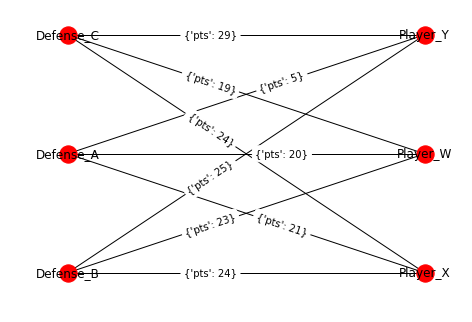

In [3]:
G = nx.from_pandas_edgelist(df, 'defense', 'player', ['pts']).to_undirected()

functions.bipartite_draw(G)

#### Hide 3 cells

Note: When working with real data, will randomly select games to be hidden, but in this example, it's so easy to randomly select 3 that make it difficult to have a realistic m-value.

In reality, will be random % hidden.

In [4]:
hidden_indices = [0]

df['hidden'] = False

for index in hidden_indices:
    df.at[index, 'hidden'] = True

In [5]:
df.head(len(df))

,defense,player,pts,hidden
0,Defense_A,Player_W,20,True
1,Defense_A,Player_X,21,False
2,Defense_A,Player_Y,5,False
3,Defense_B,Player_W,23,False
4,Defense_B,Player_X,24,False
5,Defense_B,Player_Y,25,False
6,Defense_C,Player_W,19,False
7,Defense_C,Player_X,24,False
8,Defense_C,Player_Y,29,False


#### New Graph

In [6]:
df_train = df[df['hidden'] == False].copy()

df_train.head(len(df_train))

,defense,player,pts,hidden
1,Defense_A,Player_X,21,False
2,Defense_A,Player_Y,5,False
3,Defense_B,Player_W,23,False
4,Defense_B,Player_X,24,False
5,Defense_B,Player_Y,25,False
6,Defense_C,Player_W,19,False
7,Defense_C,Player_X,24,False
8,Defense_C,Player_Y,29,False


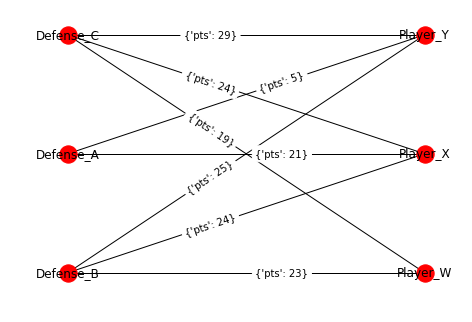

In [7]:
G_train = nx.from_pandas_edgelist(df_train, 'defense', 'player', ['pts']).to_undirected()

functions.bipartite_draw(G_train)

Can see change in number of triangles available for each edge:

In [8]:
for edge in list(G.edges()):
    defense, player = functions.split_edge(edge)
    orig_tri = functions.generate_triangle_dict(G, defense, player, 'pts')
    train_tri = functions.generate_triangle_dict(G_train, defense, player, 'pts')
    
    print(edge)    
    print('--------------------------')
    print('Original Graph: {}'.format(len(orig_tri)) )
    for tri in orig_tri:
        print(tri)
    print('Original Graph: {}'.format(len(train_tri)) )
    for tri in train_tri:
        print(tri)
    print('\n')

('Defense_A', 'Player_W')
--------------------------
Original Graph: 4
('Player_X', 'Defense_B')
('Player_X', 'Defense_C')
('Player_Y', 'Defense_B')
('Player_Y', 'Defense_C')
Original Graph: 4
('Player_X', 'Defense_B')
('Player_X', 'Defense_C')
('Player_Y', 'Defense_B')
('Player_Y', 'Defense_C')


('Defense_A', 'Player_X')
--------------------------
Original Graph: 4
('Player_W', 'Defense_B')
('Player_W', 'Defense_C')
('Player_Y', 'Defense_B')
('Player_Y', 'Defense_C')
Original Graph: 2
('Player_Y', 'Defense_B')
('Player_Y', 'Defense_C')


('Defense_A', 'Player_Y')
--------------------------
Original Graph: 4
('Player_W', 'Defense_B')
('Player_W', 'Defense_C')
('Player_X', 'Defense_B')
('Player_X', 'Defense_C')
Original Graph: 2
('Player_X', 'Defense_B')
('Player_X', 'Defense_C')


('Player_W', 'Defense_B')
--------------------------
Original Graph: 4
('Defense_A', 'Player_X')
('Player_X', 'Defense_C')
('Defense_A', 'Player_Y')
('Player_Y', 'Defense_C')
Original Graph: 2
('Player_X', '

### Build matrices

This will be done with ranking/selection method, but for this example just taking first 2 triangles and make them m1 and m2

In [9]:
M = 2

df_pred = functions.build_df_pred(G, G_train, df, M, 'pts')

df_pred

,defense,player,pts,hidden,actual,m0,m1
0,Defense_A,Player_W,20,True,20,3.275862,20.125000
1,Defense_A,Player_X,21,False,21,4.137931,4.800000
2,Defense_A,Player_Y,5,False,5,21.875000,25.375000
3,Defense_B,Player_W,23,False,23,16.379310,19.000000
4,Defense_B,Player_X,24,False,24,20.689655,105.000000
5,Defense_B,Player_Y,25,False,25,5.714286,35.105263
6,Defense_C,Player_W,19,False,19,23.000000,26.680000
7,Defense_C,Player_X,24,False,24,19.826087,121.800000
8,Defense_C,Player_Y,29,False,29,5.714286,25.000000


### Split into train/test

In [14]:
np.set_printoptions(precision=2)

In [15]:
m_columns = ['m{}'.format(m) for m in range(M)]

m_mat_train = df_pred[df_pred['hidden'] == False].as_matrix(columns=m_columns)

m_mat_train

array([[   4.14,    4.8 ],
       [  21.88,   25.38],
       [  16.38,   19.  ],
       [  20.69,  105.  ],
       [   5.71,   35.11],
       [  23.  ,   26.68],
       [  19.83,  121.8 ],
       [   5.71,   25.  ]])

In [17]:
actual_mat_train = df_pred[df_pred['hidden'] == False].as_matrix(columns=['actual'])

actual_mat_train

array([[21],
       [ 5],
       [23],
       [24],
       [25],
       [19],
       [24],
       [29]])

In [18]:
m_columns = ['m{}'.format(m) for m in range(M)]

m_mat_test = df_pred[df_pred['hidden'] == True].as_matrix(columns=m_columns)

m_mat_test

array([[  3.28,  20.12]])

In [19]:
actual_mat_test = df_pred[df_pred['hidden'] == True].as_matrix(columns=['actual'])

actual_mat_test

array([[20]])

#### Train Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(m_mat_train, actual_mat_train)

regr.coef_

array([[-0.68,  0.1 ]])

### Test

In [21]:
actual_mat_test_pred = regr.predict(m_mat_test)

actual_mat_test_pred

array([[ 26.51]])

In [22]:
resid_test = np.absolute(actual_mat_test_pred - actual_mat_test)

resid_test

array([[ 6.51]])